# <center> Часть 1.
    Для начала рассмотрим дата сет https://www.kaggle.com/drgilermo/nba-players-stats. 
    В нем представлена информация по игрокам в баскетбол, их рост, вес, дата рождения и тд.

In [230]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [231]:
df = pd.read_csv('data/player_data.csv')
print(df.shape)

(4550, 8)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [233]:
df['birth_date'] =  pd.to_datetime(df['birth_date'], format='%B %d, %Y')
df['weight'] = df.weight.astype('float64')

In [234]:
years = pd.Series([x.year for x in df.birth_date]) 

In [235]:
df = pd.concat([df, years.rename('years')], axis=1)

In [236]:
df = df.dropna()

In [237]:
df1 = df[['weight', 'years']].groupby('years').mean()
df1.head()

,weight
years,
1913.0,192.500000
1914.0,165.000000
1915.0,194.000000
1916.0,186.714286
1917.0,200.181818


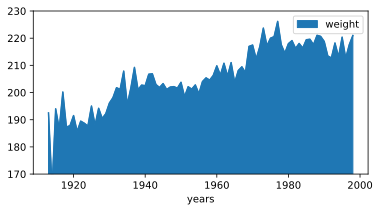

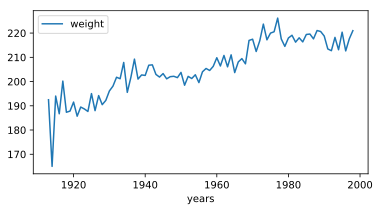

In [238]:
df1.plot(kind='area')
plt.ylim(bottom =170, top = 230)
df1.plot()

In [239]:
height_cm = pd.Series([int(x.split('-')[0])*30.48 + int(x.split('-')[1])*2.54 for x in df.height])

In [240]:
df = pd.concat([df, height_cm.rename('height_cm')], axis=1)

In [241]:
df = df.dropna()
print(df.shape)

(3894, 10)


In [242]:
df2 = df[['height_cm', 'years']].groupby('years').mean()
df2.head()

,height_cm
years,
1913.0,200.025000
1914.0,187.960000
1915.0,210.820000
1916.0,194.854286
1917.0,199.043636


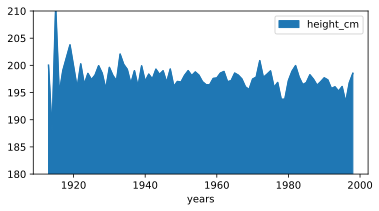

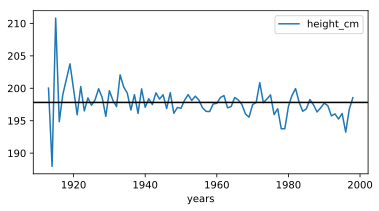

In [243]:
df2.plot(kind='area')
plt.ylim(bottom=180, top=210)
df2.plot()
plt.axhline(df2.height_cm.mean(), color='k')

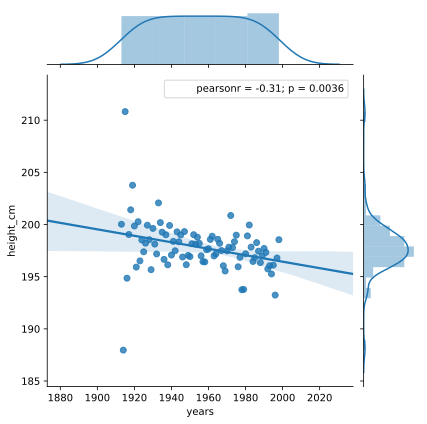

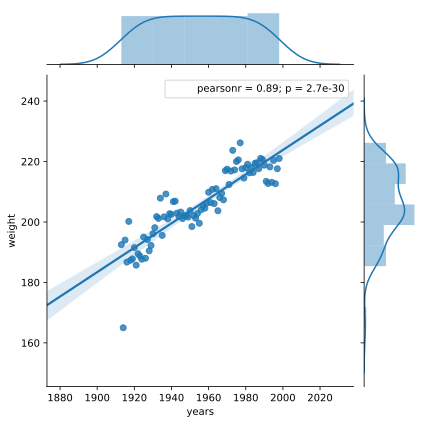

In [172]:
import numpy as np 
import seaborn as sns 
df2 = df2.reset_index()
df1 = df1.reset_index()
sns.jointplot(x='years', y='height_cm', data=df2, kind='reg');
sns.jointplot(x='years', y='weight', data=df1, kind='reg');

In [173]:
master = pd.read_csv('data/master.csv')
print(master.shape)

(27820, 12)


In [175]:
master

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [176]:
master_su = master[['age', 'suicides_no']].groupby('age').sum()
#master_su['gdp_per_capita ($)'] = master[['age', 'suicides_no']].groupby('age').mean()
master_su

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


In [186]:
trace0 = go.Bar(
    x=master_su.index,
    y=master_su.suicides_no,
    name='suicides_no'
)

data = [trace0]
layout = {'title': 'Total suicides from 1987 to 2014 by age group'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [187]:
suicides_by_age_group = master.pivot_table(
                        index='year', 
                        columns='age', 
                        values='suicides_no', 
                        aggfunc=sum).fillna(0).applymap(float)
#platform_genre_sales = platform_genre_sales.reset_index()
suicides_by_age_group.head(10)

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17870.0,20771.0,35748.0,984.0,28736.0,11954.0
1986,18063.0,21685.0,37558.0,944.0,29760.0,12660.0
1987,16432.0,22309.0,40649.0,935.0,32469.0,14048.0
1988,15337.0,21332.0,38770.0,837.0,30538.0,14212.0
1989,18636.0,29427.0,53541.0,1150.0,40087.0,17403.0
1990,23248.0,35276.0,65242.0,1477.0,47018.0,21100.0
1991,23317.0,35615.0,68374.0,1533.0,48315.0,20866.0
1992,24727.0,37758.0,75051.0,1687.0,51506.0,20744.0
1993,25262.0,39044.0,80670.0,1789.0,54278.0,20522.0


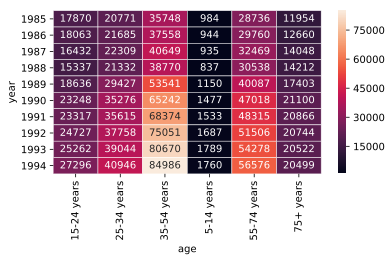

In [188]:
sns.heatmap(suicides_by_age_group.head(10), annot=True, fmt=".0f", 
            linewidths=0.5);

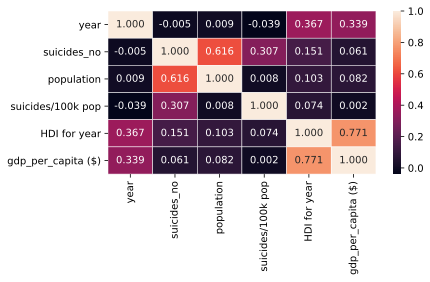

In [189]:
master.corr()
sns.heatmap(master.corr(), annot=True, fmt=".3f", 
            linewidths=0.5);

In [192]:
def get_num_columns(dfs):
    if len(dfs) == 0:
        return 0
    return sum(list(map(lambda x: len(x.columns), dfs)))

def plotly_dropdown_line_plots(slices, title):
    slices_lst = list(slices.keys())
    N_slices = len(slices_lst)

    traces_dm = []
    buttons = []
    
    for i in range(N_slices):
        slice = slices_lst[i]
        df = slices[slice]
        
        dfs_before = list(slices.values())[:i]
        dfs_after = list(slices.values())[i+1:]

        num_before = get_num_columns(dfs_before)
        num_after = get_num_columns(dfs_after)
        
        for col in df.columns:
            traces_dm.append(
                go.Scatter(
                    x = df.index,
                    y = df[col],
                    name = col,
                    visible = (i == 0),
                    mode = 'lines'
                )
            )

        buttons.append(
            dict(
                label = slice,
                method = 'restyle',
                args = ['visible', [False]*num_before + [True]*len(df.columns) + [False]*num_after]
            )
        )
    layout = go.Layout(
        title = title,
        updatemenus = [
            dict(
                x = -0.05,
                y = 1,
                yanchor = 'top',
                buttons = buttons,
            )
        ]
    )
    fig = go.Figure(data=traces_dm, layout=layout)
    iplot(fig, show_link=False)

In [250]:
suicide_by_country = {}

In [251]:
for country in master.country.unique():
    suicide_by_country[country] = master[master.country == country][['year','suicides/100k pop']].groupby('year').sum()

In [252]:
plotly_dropdown_line_plots(suicide_by_country, title = 'Suicides per 100,000 population by year')

In [247]:
suicide_by_country = {}

In [248]:
for country in master.country.unique():
    suicide_by_country[country] = master[master.country == country][['year','suicides_no']].groupby('year').sum()

In [249]:
plotly_dropdown_line_plots(suicide_by_country, title = 'Suicide rate in a particular country by year')

In [270]:
countries = pd.read_csv('data/countries of the world.csv')
print(countries.shape)
countries


(227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [282]:
countries[('EUROPE' in countries['Region'])]# | (countries['Region'] == 'WESTERN EUROPE')]
#countries_in_europe
#countries[countries['Population'] == 31056997]

KeyError: False

In [ ]:
#countries[list(filter(lambda x: x != 'Global_Sales', df1.columns))]

In [277]:
countries['Region']

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
5      SUB-SAHARAN AFRICA                 
6                  LATIN AMER. & CARIB    
7                  LATIN AMER. & CARIB    
8                  LATIN AMER. & CARIB    
9                     C.W. OF IND. STATES 
10                 LATIN AMER. & CARIB    
11     OCEANIA                            
12     WESTERN EUROPE                     
13                    C.W. OF IND. STATES 
14                 LATIN AMER. & CARIB    
15     NEAR EAST                          
16           ASIA (EX. NEAR EAST)         
17                 LATIN AMER. & CARIB    
18                    C.W. OF IND. STATES 
19     WESTERN EUROPE                     
20                 LATIN AMER. & CARIB    
21     SUB-SAHARAN AFRICA                 
22     NORTHERN AMERICA                   
23         

In [ ]:
trace0 = go.Scatter(
    x=genres_df.Critic_Score,
    y=genres_df.User_Score,
    mode = 'markers+text',
    text = genres_df.index,
    #textposition='bottom',
    marker = dict(
        size = 1/10*genres_df.Global_Sales,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'salmon',
            'wheat', 'ivory', 'silver'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of video games genres',
    'xaxis': {'title': 'Critic Score'},
    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)